# Comparison of Text Classifiers

In [98]:
import ipynb
from ipynb.fs.defs.data_collect_preprocessing import get_x_y_preprocessed
from ipynb.fs.defs.data_collect_preprocessing import get_one_hot
from ipynb.fs.defs.data_collect_preprocessing import CATEGORIES
from ipynb.fs.defs.data_collect_preprocessing import preprocess_text
import numpy as np
from scipy import stats
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import InputLayer, Input, Dense, Embedding, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import sys
#from tqdm import tqdm
import os
from tqdm.notebook import tqdm

In [9]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [10]:
print(CATEGORIES)

['sport', 'politics', 'economics', 'psychology', 'philosophy', 'literature', 'physics']


In [11]:
x_rec, y_rec = get_x_y_preprocessed("dataset_cat")

In [12]:
print("type x_rec: ", type(x_rec))
print("type y_rec: ", type(y_rec.shape))
print("x_rec: ", len(x_rec))
print("y_rec: ", y_rec.shape)

type x_rec:  <class 'list'>
type y_rec:  <class 'tuple'>
x_rec:  3341
y_rec:  (3341, 7)


In [13]:
print(x_rec[0])
print(y_rec[0])

['bbc', 'sport', 'sports', 'division', 'bbc', ',', 'providing', 'national', 'sports', 'coverage', 'bbc', 'television', ',', 'radio', 'onlinethe', 'bbc', 'holds', 'television', 'radio', 'uk', 'broadcasting', 'rights', 'several', 'sports', ',', 'broadcasting', 'sport', 'live', 'alongside', 'flagship', 'analysis', 'programmes', 'match', 'day', ',', 'test', 'match', 'special', ',', 'ski', 'sunday', ',', 'today', 'wimbledon', 'previously', 'grandstandresults', ',', 'analysis', 'coverage', 'also', 'added', 'bbc', 'sport', 'website', 'bbc', 'red', 'button', 'interactive', 'television', 'service']
[1. 0. 0. 0. 0. 0. 0.]


In [14]:
tokenizer = Tokenizer(num_words=1200)

In [15]:
tokenizer.fit_on_texts(x_rec)

In [16]:
word_index = tokenizer.word_index

In [61]:
index_word = tokenizer.index_word

In [62]:
index_word[1]

','

In [60]:
word_index["sport"]

34

In [18]:
word_index["division"]

707

In [19]:
print(type(word_index))

<class 'dict'>


In [20]:
NUM_WORDS = tokenizer.num_words
print(NUM_WORDS)

1200


In [21]:
sequences = tokenizer.texts_to_sequences(x_rec)

In [22]:
print(len(sequences))

3341


In [24]:
print(sequences[1])
print(len(sequences[1]))

[2, 70, 22, 1119, 34, 186, 1032, 91, 899, 279, 9, 675, 34, 1, 34, 659, 22, 19, 212, 34, 279, 867, 996, 1, 899, 1146, 270, 593, 900, 748, 1074, 20, 1032]
33


In [25]:
len_seq = [len(s)  for s in sequences]
len_seq = np.array(len_seq)

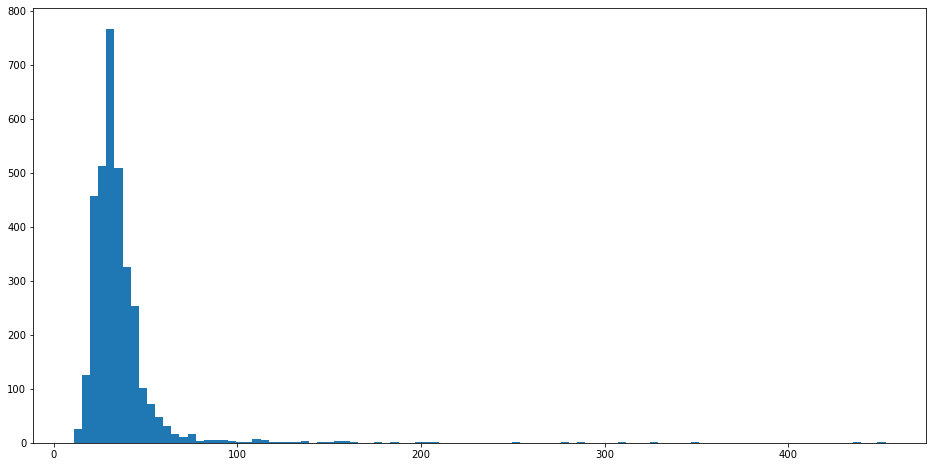

In [26]:
plt.figure(figsize=(16, 8))
plt.hist(len_seq, 100)
plt.show()

In [27]:
print("min:", len_seq.min())
print("mean:", len_seq.mean())
print("max", len_seq.max())
print("median", np.median(len_seq))
print("mode:", stats.mode(len_seq))
print("sigma:", np.std(len_seq))

PERCENTILE = 75
print(PERCENTILE, "percentile:", np.percentile(len_seq, PERCENTILE))
print("num over", PERCENTILE, "percentile:", np.count_nonzero(len_seq > np.percentile(len_seq, PERCENTILE))) 


min: 11
mean: 35.56210715354684
max 453
median 32.0
mode: ModeResult(mode=array([33]), count=array([165]))
sigma: 22.05826386456646
75 percentile: 39.0
num over 75 percentile: 761


In [30]:
SENTENCE_LENGTH = 40
print("Num sentence over SENTENCE_LENGTH:", np.count_nonzero(len_seq > SENTENCE_LENGTH)) 

Num sentence over SENTENCE_LENGTH: 691


##### Facciamo il padding per portare tutte le sequenze alla lunghezza impostate con la costante SENTENCE_LENGTH 

In [31]:
x_num_fix = pad_sequences(sequences, maxlen=SENTENCE_LENGTH)  

##### Infatti la sequence precedente è diventata:

In [33]:
x_num_fix[1]

array([   0,    0,    0,    0,    0,    0,    0,    2,   70,   22, 1119,
         34,  186, 1032,   91,  899,  279,    9,  675,   34,    1,   34,
        659,   22,   19,  212,   34,  279,  867,  996,    1,  899, 1146,
        270,  593,  900,  748, 1074,   20, 1032])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_num_fix, y_rec, test_size=0.20, random_state=42)  # dividiamo il dataset lasciando una parte (0.2 quindi 20%) per la validation


In [35]:
print("X_train: ", len(X_train))
print("y_train: ", y_train.shape)
print("X_test: ", len(X_test))
print("y_test: ", y_test.shape)

X_train:  2672
y_train:  (2672, 7)
X_test:  669
y_test:  (669, 7)


In [36]:
X_test_onehot = []
for sent in X_test:
    sent_onehot = to_categorical(sent, num_classes=NUM_WORDS)  # get_one_hot(w, NUM_WORDS)
    X_test_onehot.append(sent_onehot)


X_test_onehot = np.array(X_test_onehot)
print(X_test_onehot.shape)



(669, 40, 1200)


In [53]:
print(X_test_onehot[0])

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
X_train_onehot = []
for sent in X_train:
    sent_onehot = to_categorical(sent, num_classes=NUM_WORDS)  # get_one_hot(w, NUM_WORDS)
    X_train_onehot.append(sent_onehot)


X_train_onehot = np.array(X_train_onehot)
print(X_train_onehot.shape)



(2672, 40, 1200)


In [38]:

print(sys.getsizeof(X_train))
print(sys.getsizeof(X_train_onehot))

427632
513024128


In [45]:
print(len(X_train) )
print(len(X_train) / 16)
print(len(X_train) / 167)

2672
167.0
16.0


In [44]:
num_grp = 167
X_train_onehot1 = X_train_onehot[:num_grp]
print(X_train_onehot1.shape)

y_train1 = y_train[:num_grp]
print(y_train1.shape)

(167, 40, 1200)
(167, 7)


### Basic model - one-hot

In [46]:

inp = Input(shape=(SENTENCE_LENGTH, NUM_WORDS))
x = Dense(200, name="Layer1")(inp)  # Aggiungiamo i vari layers (gli assegnamo anche un nome per individuarli nella stampa successiva)
x = Dense(64, name="Layer2")(x) 
x = Flatten(name="No_Layer")(x)  # Aggiungiamo questo per passare dalle due dimensioni avute finora alla dimensione singola
x = Dense(64, name="Layer3")(x)
x = Dense(48, name="Layer_n-1")(x)
y = Dense(7, activation='softmax', name="Output_Layer")(x)  # Lo strato finale ha un numero di neuroni pari al numero di categorie

model_basic_onehot = Model(inp, y)

model_basic_onehot.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])  # Compiliamo il modello definendo loss, metrica per la valutazione (accuratezza) 


print(model_basic_onehot.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 1200)]        0         
                                                                 
 Layer1 (Dense)              (None, 40, 200)           240200    
                                                                 
 Layer2 (Dense)              (None, 40, 64)            12864     
                                                                 
 No_Layer (Flatten)          (None, 2560)              0         
                                                                 
 Layer3 (Dense)              (None, 64)                163904    
                                                                 
 Layer_n-1 (Dense)           (None, 48)                3120      
                                                                 
 Output_Layer (Dense)        (None, 7)                 343   

In [47]:
history_basic_onehot = model_basic_onehot.fit(X_train_onehot1, y_train1, epochs=5, verbose=1, batch_size=2, validation_data=(X_test_onehot, y_test))

Epoch 1/5
84/84 [==============================] - 6s 44ms/step - loss: 1.9140 - acc: 0.1976 - val_loss: 1.8548 - val_acc: 0.2556
Epoch 2/5
84/84 [==============================] - 3s 32ms/step - loss: 0.4897 - acc: 0.9521 - val_loss: 1.8375 - val_acc: 0.2765
Epoch 3/5
84/84 [==============================] - 2s 28ms/step - loss: 0.0106 - acc: 1.0000 - val_loss: 1.9610 - val_acc: 0.2810
Epoch 4/5
84/84 [==============================] - 2s 29ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 2.0025 - val_acc: 0.2810
Epoch 5/5
84/84 [==============================] - 2s 28ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.0250 - val_acc: 0.2840


In [48]:
acc = history_basic_onehot.history['acc']
val_acc = history_basic_onehot.history['val_acc']

loss = history_basic_onehot.history['loss']
val_loss = history_basic_onehot.history['val_loss']

for group in range(2, (len(X_train) // num_grp) + 1):
    da = num_grp * (group-1)
    a = num_grp * group
    if a > len(X_train_onehot):
        a = len(X_train_onehot)
    X_train_onehot_part = X_train_onehot[da:a]
    print(X_train_onehot_part.shape)

    y_train_part = y_train[da:a]
    print(y_train_part.shape)

    print(group, "- da", da, "a", a)
    history_basic_onehot = model_basic_onehot.fit(X_train_onehot_part, y_train_part, epochs=group * 5, initial_epoch=(group-1) * 5, verbose=1, batch_size=2, validation_data=(X_test_onehot, y_test))
    acc += history_basic_onehot.history['acc']
    val_acc += history_basic_onehot.history['val_acc']

    loss += history_basic_onehot.history['loss']
    val_loss += history_basic_onehot.history['val_loss'] 

(167, 40, 1200)
(167, 7)
2 - da 167 a 334
Epoch 6/10
84/84 [==============================] - 3s 31ms/step - loss: 2.0541 - acc: 0.3353 - val_loss: 1.7418 - val_acc: 0.3827
Epoch 7/10
84/84 [==============================] - 3s 31ms/step - loss: 0.1595 - acc: 0.9521 - val_loss: 1.9245 - val_acc: 0.3408
Epoch 8/10
84/84 [==============================] - 3s 31ms/step - loss: 0.0088 - acc: 1.0000 - val_loss: 1.8891 - val_acc: 0.3722
Epoch 9/10
84/84 [==============================] - 3s 31ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 1.9015 - val_acc: 0.3737
Epoch 10/10
84/84 [==============================] - 3s 32ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.9072 - val_acc: 0.3722
(167, 40, 1200)
(167, 7)
3 - da 334 a 501
Epoch 11/15
84/84 [==============================] - 3s 32ms/step - loss: 1.6047 - acc: 0.4371 - val_loss: 1.4927 - val_acc: 0.5007
Epoch 12/15
84/84 [==============================] - 3s 33ms/step - loss: 0.0256 - acc: 1.0000 - val_loss: 1.2980 - val_acc: 0.5

In [49]:

def plot_loss_accuracy(acc, val_acc, loss, val_loss):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
    

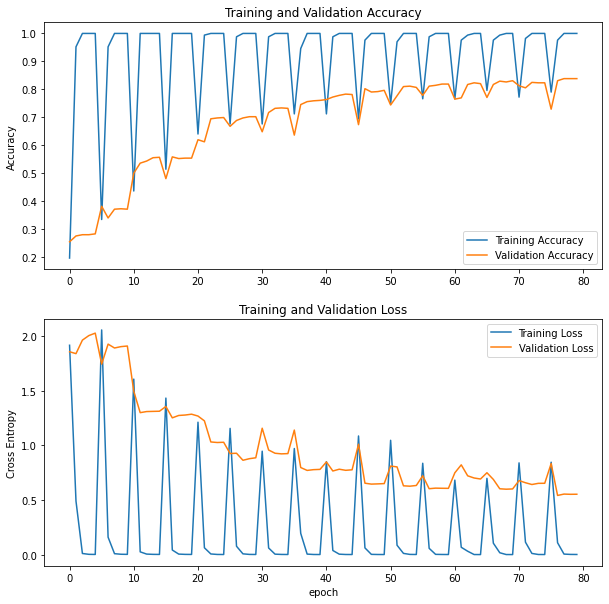

In [50]:
plot_loss_accuracy(acc, val_acc, loss, val_loss)

In [51]:
len(acc)

80

### Basic model - embedding layer

In [52]:
EMBEDDING_DIM = 100

In [54]:
model_basic_emb = Sequential()  # Instanziamo Sequential
model_basic_emb.add(Embedding(NUM_WORDS + 1,  # il numero di righe (numero di parole + 1)
                        EMBEDDING_DIM,  #  il numero di colonne (lunghezza dei vettori)
                        input_length=SENTENCE_LENGTH,  # la lunghezza delle frasi
                        trainable=True))
model_basic_emb.add(Dense(128, name="Layer1"))  # Aggiungiamo i vari layers (gli assegnamo anche un nome per individuarli nella stampa successiva)
model_basic_emb.add(Dense(64, name="Layer2")) 
model_basic_emb.add(Flatten(name="No_Layer"))  # Aggiungiamo questo per passare dalle due dimensioni avute finora alla dimensione singola
model_basic_emb.add(Dense(64, name="Layer3"))
model_basic_emb.add(Dense(48, name="Layer_n-1"))
model_basic_emb.add(Dense(7, activation='softmax', name="Output_Layer"))  # Lo strato finale ha un numero di neuroni pari al numero di categorie
model_basic_emb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])  # Compiliamo il modello definendo loss, metrica per la valutazione (accuratezza) 

print(model_basic_emb.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           120100    
                                                                 
 Layer1 (Dense)              (None, 40, 128)           12928     
                                                                 
 Layer2 (Dense)              (None, 40, 64)            8256      
                                                                 
 No_Layer (Flatten)          (None, 2560)              0         
                                                                 
 Layer3 (Dense)              (None, 64)                163904    
                                                                 
 Layer_n-1 (Dense)           (None, 48)                3120      
                                                                 
 Output_Layer (Dense)        (None, 7)                 3

In [55]:
history_basic_emb = model_basic_emb.fit(X_train, y_train, epochs=7, verbose=1, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/7
21/21 [==============================] - 5s 90ms/step - loss: 1.8017 - acc: 0.2863 - val_loss: 1.5472 - val_acc: 0.3991
Epoch 2/7
21/21 [==============================] - 1s 42ms/step - loss: 0.9400 - acc: 0.7107 - val_loss: 0.6909 - val_acc: 0.7713
Epoch 3/7
21/21 [==============================] - 1s 50ms/step - loss: 0.2929 - acc: 0.9091 - val_loss: 0.4821 - val_acc: 0.8625
Epoch 4/7
21/21 [==============================] - 1s 42ms/step - loss: 0.0794 - acc: 0.9805 - val_loss: 0.4736 - val_acc: 0.8625
Epoch 5/7
21/21 [==============================] - 1s 44ms/step - loss: 0.0212 - acc: 0.9974 - val_loss: 0.5170 - val_acc: 0.8655
Epoch 6/7
21/21 [==============================] - 1s 49ms/step - loss: 0.0066 - acc: 0.9993 - val_loss: 0.5557 - val_acc: 0.8714
Epoch 7/7
21/21 [==============================] - 1s 44ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.5782 - val_acc: 0.8610


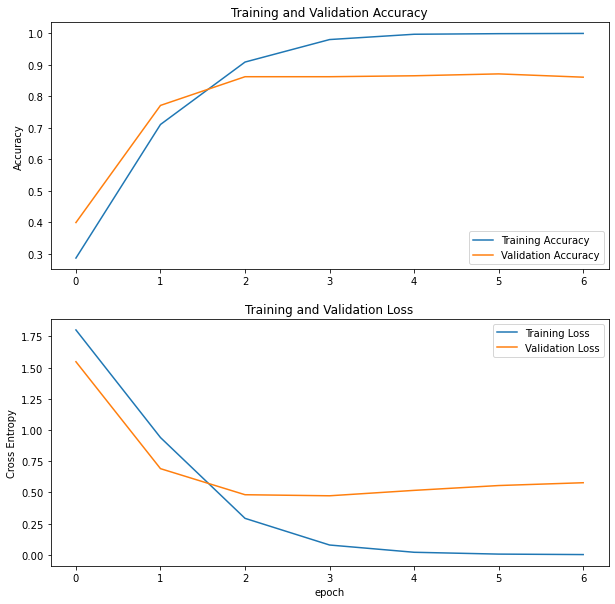

In [56]:
acc = history_basic_emb.history['acc']
val_acc = history_basic_emb.history['val_acc']

loss = history_basic_emb.history['loss']
val_loss = history_basic_emb.history['val_loss']

plot_loss_accuracy(acc, val_acc, loss, val_loss)

### Basic model - embedding glove

In [57]:
MY_EMBEDDING_PATH = "C:\\Users\\lpdepersiis\\PycharmProjects\\autoencoderNlp\\embedding\\en\\glove\\"


In [58]:
def get_word_matrix():
    """
    Questa funzione ci serve per crearci un dizionario avente come indice la parola e come valore il vettore dell'embedding corrispondente
    """
    word_matrix = {}
    with open(MY_EMBEDDING_PATH + 'glove.6B.100d.txt', 'r', encoding='UTF-8') as file_emb:
        lines = [line for line in file_emb]
        for row in tqdm(lines, total=len(lines)): # leggo ogni riga del file di testo contenente l'embedding
            row = row.split() # la divido nei suoi elementi
            word_matrix[row[0]] = np.array(row[1:], dtype='float32') # il primo è la parola e sarà l'indice di questa voce, gli altri andranno a formare il vettore 
    return word_matrix

In [59]:
word_matrix = get_word_matrix()

print(len(word_matrix))


400000


In [ ]:
word_matrix["house"]  

##### ora abbiamo l'indice ottenuto tramite Tokenizer dai nostri testi ed abbiamo un dizionario che fa corrispondere ad ogni parola il vettore corrispondente dell'embedding GloVe, dobbiamo creare una matrice in cui le righe siano nello stesso ordine dell'indice ottenuto dal tokenizer e che contenga solo quei vettori (più lo 0 che è lasciato con un vettore di zeri per essere usato ad indicare l'assenza di una parola)

In [63]:
def get_embedding_matrix(embeddings_index, word_index, dim_embeddings=EMBEDDING_DIM, num_words=NUM_WORDS):
    """
    Tramite questa funzione creiamo una matrice in cui le righe siano nello stesso ordine dell'indice ottenuto dal tokenizer 
    e che contenga solo i vettori relativi alle parole in esso contenute
    
    :param embeddings_index: il dizionario, ottenuto dall'embedding, avente le parole come indice ed i vettori come valore
    :param word_index:  il dizionario ottenuto dal tokenizer avente come indice la parola e come valore il suo indice
    :param dim_embeddings: la lunghezza dei vettori dell'embedding che stiamo utilizzando
    :param num_words: il numero di parole più frequenti da utilizzare
    :return: la matrice dei vettori dell'embedding ordinata come il nostro indice

    """
    embedding_matrix = np.zeros((num_words + 1, dim_embeddings))  # creiamo la matrice di zeri avente tante righe quante sono le parole (più una) e tante colonne quante sono quelle dei vettori
    error_word = []
    for word in tqdm(word_index.keys(), total=num_words):  # Scorriamo le parole dell'indice del tokenizer
        if word_index[word] >= num_words:
            break
        embedding_vector = embeddings_index.get(word)  # estraiamo il vettore corrispondente
        if embedding_vector is not None:  # verifichiamo che esista (anche se il nostro dizionario è più piccolo di quello dell'embedding potrebbe contenere parolo non presenti in esso)
            # se la parola è presente andiamo avanti (se non è presente, in corrispondenza di questo indice, rimarrà il vettore formato da zeri)
            embedding_matrix[word_index[word]] = embedding_vector  # impostiamo nella matrice quella riga con il vettore corrispondente alla parola
        else:
            error_word.append(word)
    
    print(error_word)
    return embedding_matrix

In [64]:
word_index = tokenizer.word_index
embedding_matrix = get_embedding_matrix(word_matrix, word_index)


['', '{\\displaystyle', '"the', '⋅', '(or', '{\\frac', '−', '(the', '\\mathbf', '(e', "one's", '(such', '∫', '{x}', '(in', '\\cdot', "women's", '{f}', '(see', '˙', '{v}', '\\psi', '{\\mathbf', "master's", '\\int', '(i']


In [65]:
print(embedding_matrix.shape)

(1201, 100)


In [66]:
def get_embedding_layer(embedding_matrix, input_length=SENTENCE_LENGTH, trainable=False):
    """
     Instanzia lo strato di tipo Embedding

    :param embedding_matrix: Il dizionario ottenuto dall'embedding avente le parole come indice e il vettore come valore
    :param input_length: La lunghezza delle frasi che saranno passate come input
    
    :return: lo strato di tipo Embedding
    """

    embedding_layer = Embedding(  # Creiamo un'istanza del layer di tipo Embedding ed impostiamo i parametri indispensabili e quelli necessari per le nostre esigenze
                        embedding_matrix.shape[0],  # il numero di righe (numero di parole + 1)
                        embedding_matrix.shape[1],  #  il numero di colonne (lunghezza dei vettori)
                        weights=[embedding_matrix],  # l'embedding_matrix creata tramite la funzione precedente
                        input_length=input_length,  # la lunghezza delle frasi
                        trainable=trainable)  # Impostiamo se questo strato deve essere addestrabile o meno, se lo impostiamo addestrabile i vettori si modificheranno

    return embedding_layer  # restituiamo lo strato Embedding



In [73]:
model_base_glove = Sequential()  # Instanziamo Sequential
model_base_glove.add(Embedding(embedding_matrix.shape[0],  # il numero di righe (numero di parole + 1)
                    embedding_matrix.shape[1],  #  il numero di colonne (lunghezza dei vettori)
                    weights=[embedding_matrix],  # l'embedding_matrix creata tramite la funzione precedente
                    input_length=SENTENCE_LENGTH,  # la lunghezza delle frasi
                    trainable=False)  # Impostiamo se questo strato deve essere addestrabile o meno, se lo impostiamo addestrabile i vettori si modificheranno
                    )  
model_base_glove.add(Dense(128, name="Layer1"))  # Aggiungiamo i vari layers (gli assegnamo anche un nome per individuarli nella stampa successiva)
model_base_glove.add(Dense(64, name="Layer2")) 
model_base_glove.add(Flatten(name="No_Layer"))  # Aggiungiamo questo per passare dalle due dimensioni avute finora alla dimensione singola
model_base_glove.add(Dense(64, name="Layer3"))
model_base_glove.add(Dense(48, name="Layer_n-1"))
model_base_glove.add(Dense(7, activation='softmax', name="Output_Layer"))  # Lo strato finale ha un numero di neuroni pari al numero di categorie

model_base_glove.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])  # Compiliamo il modello definendo loss, metrica per la valutazione (accuratezza) 

print(model_base_glove.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 100)           120100    
                                                                 
 Layer1 (Dense)              (None, 40, 128)           12928     
                                                                 
 Layer2 (Dense)              (None, 40, 64)            8256      
                                                                 
 No_Layer (Flatten)          (None, 2560)              0         
                                                                 
 Layer3 (Dense)              (None, 64)                163904    
                                                                 
 Layer_n-1 (Dense)           (None, 48)                3120      
                                                                 
 Output_Layer (Dense)        (None, 7)                

#### Lanciamo l'addestramento 

In [74]:
history_base_glove = model_base_glove.fit(X_train, y_train, epochs=10, verbose=1, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 4s 74ms/step - loss: 1.4797 - acc: 0.4910 - val_loss: 0.8765 - val_acc: 0.7115
Epoch 2/10
21/21 [==============================] - 1s 34ms/step - loss: 0.5475 - acc: 0.8196 - val_loss: 0.6558 - val_acc: 0.7892
Epoch 3/10
21/21 [==============================] - 1s 40ms/step - loss: 0.3051 - acc: 0.9072 - val_loss: 0.6303 - val_acc: 0.7922
Epoch 4/10
21/21 [==============================] - 1s 39ms/step - loss: 0.1926 - acc: 0.9525 - val_loss: 0.6482 - val_acc: 0.7922
Epoch 5/10
21/21 [==============================] - 1s 37ms/step - loss: 0.1158 - acc: 0.9798 - val_loss: 0.6885 - val_acc: 0.8012
Epoch 6/10
21/21 [==============================] - 1s 38ms/step - loss: 0.0699 - acc: 0.9906 - val_loss: 0.7512 - val_acc: 0.7982
Epoch 7/10
21/21 [==============================] - 1s 37ms/step - loss: 0.0390 - acc: 0.9985 - val_loss: 0.7823 - val_acc: 0.8057
Epoch 8/10
21/21 [==============================] - 1s 39ms/step - loss: 0.0230 - a

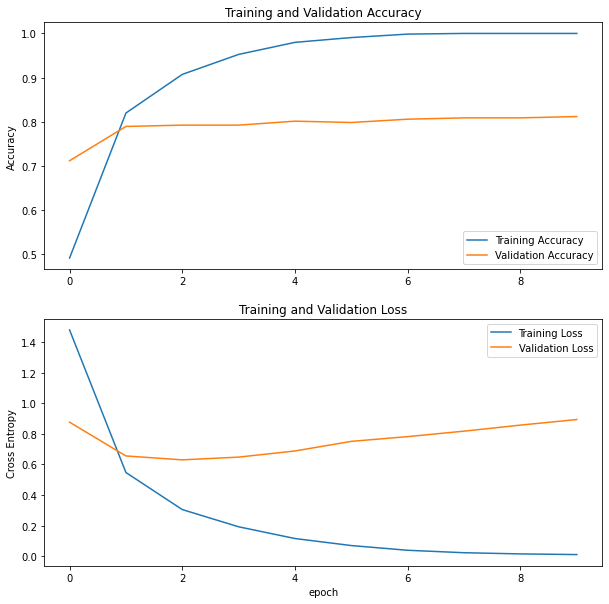

In [75]:
acc = history_base_glove.history['acc']
val_acc = history_base_glove.history['val_acc']

loss = history_base_glove.history['loss']
val_loss = history_base_glove.history['val_loss']

plot_loss_accuracy(acc, val_acc, loss, val_loss)

#### Notando che va molto presto in overfitting, è chiaro che dovremmo aumentare il numero degli esempi andando a raccogliere altri documenti, comunque possiamo provare ad aggiungere un po' di dropout

### Model embedding glove dropout

In [76]:
model_glove_dropout = Sequential()  
model_glove_dropout.add(get_embedding_layer(embedding_matrix, trainable=True)) 
model_glove_dropout.add(Dense(128, name="Layer1"))  
model_glove_dropout.add(Dropout(0.5)) # Strato di Dropout che ad ogni passaggio disabilita una certa quantità di connessioni (in questo caso il 30%)
model_glove_dropout.add(Dense(64, name="Layer2"))  
model_glove_dropout.add(Flatten(name="No_Layer"))
model_glove_dropout.add(Dropout(0.4))
model_glove_dropout.add(Dense(64, name="Layer3"))
model_glove_dropout.add(Dropout(0.3)) # Qui ne disabilitiamo il 20%
model_glove_dropout.add(Dense(48, name="Layer_n-1"))
model_glove_dropout.add(Dense(7, activation='softmax', name="Output_Layer"))  

model_glove_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])  

print(model_glove_dropout.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 40, 100)           120100    
                                                                 
 Layer1 (Dense)              (None, 40, 128)           12928     
                                                                 
 dropout (Dropout)           (None, 40, 128)           0         
                                                                 
 Layer2 (Dense)              (None, 40, 64)            8256      
                                                                 
 No_Layer (Flatten)          (None, 2560)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2560)              0         
                                                                 
 Layer3 (Dense)              (None, 64)               

In [77]:
history_glove_dropout = model_glove_dropout.fit(X_train, y_train, epochs=15, verbose=1, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/15
21/21 [==============================] - 6s 110ms/step - loss: 2.4643 - acc: 0.2979 - val_loss: 1.0711 - val_acc: 0.6203 0s - loss: 2.4643 - acc: 0.297
Epoch 2/15
21/21 [==============================] - 1s 68ms/step - loss: 1.2205 - acc: 0.5640 - val_loss: 0.7772 - val_acc: 0.7459
Epoch 3/15
21/21 [==============================] - 2s 75ms/step - loss: 0.8294 - acc: 0.7062 - val_loss: 0.6420 - val_acc: 0.7818
Epoch 4/15
21/21 [==============================] - 1s 68ms/step - loss: 0.6690 - acc: 0.7549 - val_loss: 0.5674 - val_acc: 0.8191
Epoch 5/15
21/21 [==============================] - 2s 72ms/step - loss: 0.5186 - acc: 0.8192 - val_loss: 0.5262 - val_acc: 0.8311
Epoch 6/15
21/21 [==============================] - 2s 74ms/step - loss: 0.4428 - acc: 0.8432 - val_loss: 0.4827 - val_acc: 0.8460
Epoch 7/15
21/21 [==============================] - 2s 75ms/step - loss: 0.3651 - acc: 0.8716 - val_loss: 0.4960 - val_acc: 0.8341
Epoch 8/15
21/21 [==============================] -

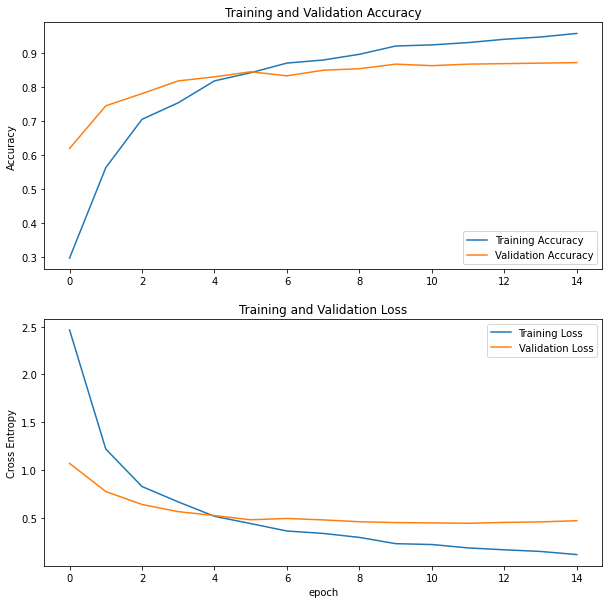

In [78]:
acc = history_glove_dropout.history['acc']
val_acc = history_glove_dropout.history['val_acc']

loss = history_glove_dropout.history['loss']
val_loss = history_glove_dropout.history['val_loss']

plot_loss_accuracy(acc, val_acc, loss, val_loss)

##### A questo punto si possono provare altri aggiustamenti, tra cui soprattutto aggiungere strati più sofisticati che prevedono convoluzione e ricorrenza
#### Ad esempio Conv1D, Bidirectional, GRU, LSTM ecc.

### Model embedding glove GRU dropout

In [79]:
from tensorflow.keras.layers import Conv1D, Bidirectional, GRU, LSTM


In [80]:
model_glove_gru = Sequential() 
model_glove_gru.add(get_embedding_layer(embedding_matrix, trainable=True))  
model_glove_gru.add(Bidirectional(GRU(40, dropout=0.3)))
model_glove_gru.add(Dropout(0.3))
model_glove_gru.add(Dense(128, name="Layer1"))  
model_glove_gru.add(Dropout(0.5))
model_glove_gru.add(Dense(64, name="Layer2")) 
model_glove_gru.add(Flatten(name="No_Layer")) 
model_glove_gru.add(Dropout(0.5))
model_glove_gru.add(Dense(64, name="Layer3"))
model_glove_gru.add(Dropout(0.4))
model_glove_gru.add(Dense(48, name="Layer_n-1"))
model_glove_gru.add(Dense(7, activation='softmax', name="Output_Layer"))

model_glove_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) 

print(model_glove_gru.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 40, 100)           120100    
                                                                 
 bidirectional (Bidirectiona  (None, 80)               34080     
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 Layer1 (Dense)              (None, 128)               10368     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 Layer2 (Dense)              (None, 64)                8256      
                                                      

In [81]:
history_glove_gru = model_glove_gru.fit(X_train, y_train, epochs=15, verbose=1, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/15
21/21 [==============================] - 24s 289ms/step - loss: 2.2257 - acc: 0.1722 - val_loss: 1.8074 - val_acc: 0.2870
Epoch 2/15
21/21 [==============================] - 3s 119ms/step - loss: 1.8998 - acc: 0.2305 - val_loss: 1.7098 - val_acc: 0.3767
Epoch 3/15
21/21 [==============================] - 3s 139ms/step - loss: 1.7794 - acc: 0.2837 - val_loss: 1.5509 - val_acc: 0.5082
Epoch 4/15
21/21 [==============================] - 3s 133ms/step - loss: 1.6438 - acc: 0.3458 - val_loss: 1.3002 - val_acc: 0.5934
Epoch 5/15
21/21 [==============================] - 3s 136ms/step - loss: 1.4115 - acc: 0.4528 - val_loss: 1.0119 - val_acc: 0.6428
Epoch 6/15
21/21 [==============================] - 3s 137ms/step - loss: 1.1775 - acc: 0.5632 - val_loss: 0.7646 - val_acc: 0.7190
Epoch 7/15
21/21 [==============================] - 3s 135ms/step - loss: 0.9739 - acc: 0.6426 - val_loss: 0.5901 - val_acc: 0.8042
Epoch 8/15
21/21 [==============================] - 3s 146ms/step - loss: 0

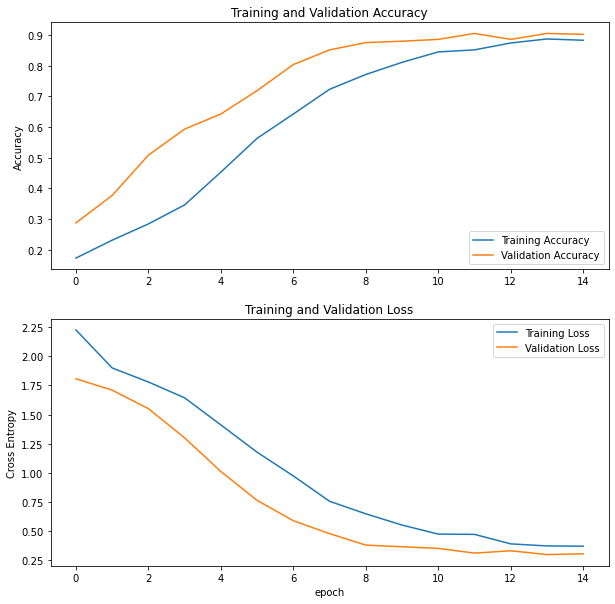

In [82]:
acc = history_glove_gru.history['acc']
val_acc = history_glove_gru.history['val_acc']

loss = history_glove_gru.history['loss']
val_loss = history_glove_gru.history['val_loss']

plot_loss_accuracy(acc, val_acc, loss, val_loss)

In [83]:
model_glove_conv = Sequential() 
model_glove_conv.add(get_embedding_layer(embedding_matrix, trainable=True))  
model_glove_conv.add(Conv1D(filters=32, kernel_size=5, activation="relu"))
model_glove_conv.add(Dropout(0.3))
model_glove_conv.add(Dense(64, name="Layer1"))  
model_glove_conv.add(Dropout(0.5))
model_glove_conv.add(Dense(64, name="Layer2")) 
model_glove_conv.add(Flatten(name="No_Layer")) 
model_glove_conv.add(Dropout(0.5))
model_glove_conv.add(Dense(64, name="Layer3"))
model_glove_conv.add(Dropout(0.4))
model_glove_conv.add(Dense(48, name="Layer_n-1"))
model_glove_conv.add(Dense(7, activation='softmax', name="Output_Layer"))

model_glove_conv.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) 

print(model_glove_conv.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 40, 100)           120100    
                                                                 
 conv1d (Conv1D)             (None, 36, 32)            16032     
                                                                 
 dropout_7 (Dropout)         (None, 36, 32)            0         
                                                                 
 Layer1 (Dense)              (None, 36, 64)            2112      
                                                                 
 dropout_8 (Dropout)         (None, 36, 64)            0         
                                                                 
 Layer2 (Dense)              (None, 36, 64)            4160      
                                                                 
 No_Layer (Flatten)          (None, 2304)             

In [84]:
history_glove_conv = model_glove_conv.fit(X_train, y_train, epochs=15, verbose=1, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/15
42/42 [==============================] - 6s 62ms/step - loss: 2.0566 - acc: 0.1946 - val_loss: 1.6846 - val_acc: 0.3602
Epoch 2/15
42/42 [==============================] - 2s 42ms/step - loss: 1.3641 - acc: 0.4880 - val_loss: 0.8867 - val_acc: 0.6831
Epoch 3/15
42/42 [==============================] - 2s 41ms/step - loss: 0.9214 - acc: 0.6456 - val_loss: 0.6900 - val_acc: 0.7653
Epoch 4/15
42/42 [==============================] - 2s 42ms/step - loss: 0.6576 - acc: 0.7743 - val_loss: 0.5021 - val_acc: 0.8416
Epoch 5/15
42/42 [==============================] - 2s 46ms/step - loss: 0.5061 - acc: 0.8323 - val_loss: 0.4531 - val_acc: 0.8520
Epoch 6/15
42/42 [==============================] - 2s 48ms/step - loss: 0.3909 - acc: 0.8694 - val_loss: 0.4353 - val_acc: 0.8520
Epoch 7/15
42/42 [==============================] - 2s 44ms/step - loss: 0.3342 - acc: 0.8859 - val_loss: 0.3796 - val_acc: 0.8804
Epoch 8/15
42/42 [==============================] - 2s 41ms/step - loss: 0.2868 - a

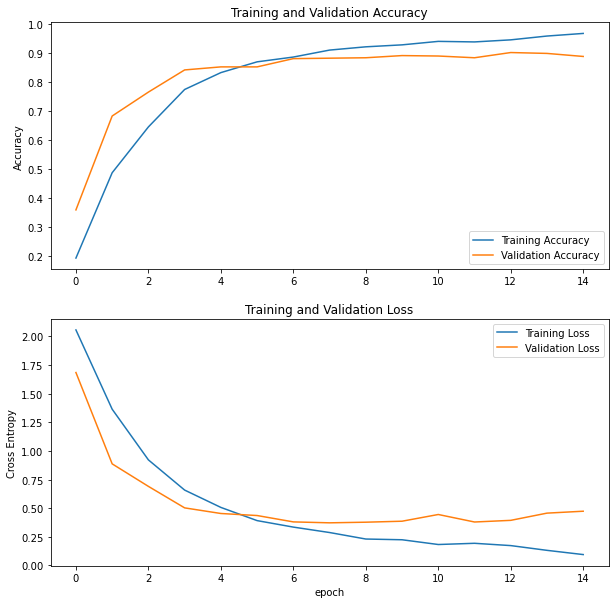

In [85]:
acc = history_glove_conv.history['acc']
val_acc = history_glove_conv.history['val_acc']

loss = history_glove_conv.history['loss']
val_loss = history_glove_conv.history['val_loss']

plot_loss_accuracy(acc, val_acc, loss, val_loss)

#### Confrontiamo i modelli con delle frasi nuove

In [86]:
models = {"model_basic_onehot":[model_basic_onehot, history_basic_onehot],
          "model_basic_emb": [model_basic_emb, history_basic_emb],
          "model_base_glove": [model_base_glove, history_base_glove], 
          "model_glove_dropout": [model_glove_dropout, history_glove_dropout],
          "model_glove_conv": [model_glove_conv, history_glove_conv],
          "model_glove_gru": [model_glove_gru, history_glove_gru]
         }
for k in models.keys():  
    print("\n", k)
    print(max(models[k][1].history['val_acc']))



 model_basic_onehot
0.8385650515556335

 model_basic_emb
0.8714499473571777

 model_base_glove
0.8116592168807983

 model_glove_dropout
0.872944712638855

 model_glove_conv
0.9013453125953674

 model_glove_gru
0.9058296084403992


In [90]:
text = "Corporate finance deals with the actions that managers take to increase the value of the firm to the shareholders, the sources of funding and the capital structure of corporations, and the tools and analysis used to allocate financial resources. While corporate finance is in principle different from managerial finance, which studies the financial management of all firms rather than corporations alone, the concepts are applicable to the financial problems of all firms, [2] and this area is then often referred to "
text = preprocess_text(text)
sequence = tokenizer.texts_to_sequences([text])
print(sequence)
padded_seq = pad_sequences(sequence, maxlen=SENTENCE_LENGTH) 
for k in models.keys():  
    print("\n", k)
    if k == 'model_basic_onehot':
        padded_seq_onehot = to_categorical(padded_seq, num_classes=NUM_WORDS) 
        y = models[k][0].predict(padded_seq_onehot)
    else:
        y = models[k][0].predict(padded_seq)
    print(y)
    print(np.argmax(y))
    print(CATEGORIES[np.argmax(y)])


[[741, 770, 349, 251, 431, 1, 607, 506, 1023, 490, 1, 163, 37, 1014, 655, 741, 309, 45, 839, 741, 1, 61, 1014, 722, 127, 1, 408, 1014, 225, 1, 423, 29, 350, 2]]

 model_basic_onehot
[[5.5305885e-05 5.6508305e-03 9.9256825e-01 8.1905426e-04 4.1254843e-04
  5.8010968e-08 4.9400190e-04]]
2
economics

 model_basic_emb
[[1.1059082e-04 9.7077510e-09 9.9988842e-01 2.0361848e-11 5.0409824e-14
  7.1931180e-07 2.5044932e-07]]
2
economics

 model_base_glove
[[4.9339789e-11 1.3992799e-07 9.9989319e-01 1.0598863e-04 7.6801814e-07
  7.4112168e-11 7.6312741e-12]]
2
economics

 model_glove_dropout
[[7.9202152e-11 6.3129601e-06 9.9999261e-01 7.8806301e-07 2.5161310e-07
  4.3719455e-12 8.7956076e-10]]
2
economics

 model_glove_conv
[[1.3489220e-21 7.6711397e-13 1.0000000e+00 2.8222346e-15 4.0091848e-15
  6.8340796e-28 5.1240361e-21]]
2
economics

 model_glove_gru
[[2.24720497e-06 2.34938087e-03 9.97562289e-01 1.13955875e-05
  1.00237567e-05 4.15241563e-10 6.46380795e-05]]
2
economics
